This notebook is for making velcoity plots in x,y,z galactocentric coordinates

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24})
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack, join

import MagellanicStream as ms

import warnings
warnings.filterwarnings('ignore')

In [2]:
def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    # adds all elements it doesn't know yet to seen and all other to seen_twice
    seen_twice = set( x for x in seq if x in seen or seen_add(x) )
    # turn the set into a list (as requested)
    return list( seen_twice )

In [3]:
#break up the monarch table
monarch = fits.getdata('/Users/joshpovick/Desktop/Research/MS_young/monarch.fits',1)
tmon = Table(monarch)
tmon.sort('NAME')

dupwhere = np.where((tmon['tdupont_oid']!=999999)&(tmon['bstars2_oid']==999999))
bstwhere = np.where((tmon['bstars2_oid']!=999999)&(tmon['tdupont_oid']==999999))

duptab = tmon[dupwhere]
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))
duptab.add_row(np.arange(141))

specfitdup = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/dupont_final.fits',1)

addnames = ['DI1294','DI1354','DI1463','DI1516','DI1557','DI1614','DI1678']
for i in range(len(addnames)):
    duptab['NAME'][i+65] = addnames[i]
    duptab['RA'][i+65] = specfitdup['RA'][i+65]
    duptab['DEC'][i+65] = specfitdup['DEC'][i+65]
    duptab['GLON'][i+65] = specfitdup['GLON'][i+65]
    duptab['GLAT'][i+65] = specfitdup['GLAT'][i+65]
    duptab['MLON'][i+65] = specfitdup['MLON'][i+65]
    duptab['MLAT'][i+65] = specfitdup['MLAT'][i+65]
    duptab['V'][i+65] = specfitdup['V'][i+65]
    duptab['BV'][i+65] = specfitdup['BV'][i+65]
    duptab['EBV'][i+65] = specfitdup['EBV'][i+65]
    duptab['VHELIO'][i+65] = specfitdup['VHELIO'][i+65]
    duptab['VERR'][i+65] = specfitdup['VERR'][i+65]
    duptab['VLSR'][i+65] = specfitdup['VLSR'][i+65]
    duptab['VGSR'][i+65] = specfitdup['VGSR'][i+65]

for j in range(len(duptab)):
    duptab['TEFF'][j] = specfitdup['TEFF'][j]
    duptab['TEFFERR'][j] = specfitdup['TEFFERR'][j]
    duptab['LOGG'][j] = specfitdup['LOGG'][j]
    duptab['LOGGERR'][j] = specfitdup['LOGGERR'][j]
    duptab['METAL'][j] = specfitdup['METAL'][j]
    duptab['METALERR'][j] = specfitdup['METALERR'][j]
    duptab['VSINI'][j] = specfitdup['VSINI'][j]
    duptab['VSINIERR'][j] = specfitdup['VSINIERR'][j]
    
bsttab = tmon[bstwhere]


In [4]:
duptab.show_in_browser(jsviewer=True)

In [5]:
#New Gaia Crossmatch for seven new sources at end
#one of the new source is a duplicate from the original B stars but have not determined if there is overlap
#as some of the source are dupliactes but do not overlap in velocity

new = Table()
new['NAME'] = specfitdup['STAR'][65:72]
new['RA'] = specfitdup['RA'][65:72]
new['DEC'] = specfitdup['DEC'][65:72]
new['GLON'] = specfitdup['GLON'][65:72]
new['GLAT'] = specfitdup['GLAT'][65:72]
new['MLON'] = specfitdup['MLON'][65:72]
new['MLAT'] = specfitdup['MLAT'][65:72]
new['V'] = specfitdup['V'][65:72]
new['BV'] = specfitdup['BV'][65:72]
new['EBV'] = specfitdup['EBV'][65:72]
new['VHELIO'] = specfitdup['VHELIO'][65:72]
new['VERR'] = specfitdup['VERR'][65:72]
new['VLSR'] = specfitdup['VLSR'][65:72]
new['VGSR'] = specfitdup['VGSR'][65:72]
new['TEFF'] = specfitdup['TEFF'][65:72]
new['TEFFERR'] = specfitdup['TEFFERR'][65:72]
new['LOGG'] = specfitdup['LOGG'][65:72]
new['LOGGERR'] = specfitdup['LOGGERR'][65:72]
new['METAL'] = specfitdup['METAL'][65:72]
new['METALERR'] = specfitdup['METALERR'][65:72]
new['VSINI'] = specfitdup['VSINI'][65:72]
new['VSINIERR'] = specfitdup['VSINIERR'][65:72]


#new.show_in_browser(jsviewer=True)
#new.write('/Users/joshpovick/Desktop/Research/MS_young/new.dat',format='ascii',overwrite=True)

tnew = Table(fits.getdata('/Users/joshpovick/Desktop/Research/MS_young/new7as.fits',1))
#tnew.show_in_browser(jsviewer=True)
tnew['col1'].name = 'NAME'
tnew['col2'].name = 'RA'
tnew['col3'].name = 'DEC'
tnew['col4'].name = 'GLON'
tnew['col5'].name = 'GLAT'
tnew['col6'].name = 'MLON'
tnew['col7'].name = 'MLAT'
tnew['col8'].name = 'V'
tnew['col9'].name = 'BV'
tnew['col10'].name = 'EBV'
tnew['col11'].name = 'VHELIO'
tnew['col12'].name = 'VERR'
tnew['col13'].name = 'VLSR'
tnew['col14'].name = 'VGSR'
tnew['col15'].name = 'TEFF'
tnew['col16'].name = 'TEFFERR'
tnew['col17'].name = 'LOGG'
tnew['col18'].name = 'LOGGERR'
tnew['col19'].name = 'METAL'
tnew['col20'].name = 'METALERR'
tnew['col21'].name = 'VSINI'
tnew['col22'].name= 'VSINIERR'

list_duplicates(tnew['NAME'])
print(tnew['dist'][np.where(tnew['NAME']=='DI1557')])
print(np.squeeze(np.where(tnew['NAME']=='DI1557')))
print(tnew['dist'][np.where(tnew['NAME']=='DI1294')])
print(np.squeeze(np.where(tnew['NAME']=='DI1294')))
keepidx = np.delete(range(len(tnew)),[5,0])
print(keepidx)
tnew = tnew[keepidx]

         dist         
----------------------
 0.0014728205016436855
0.00029357497558518984
[5 6]
         dist         
----------------------
 0.0016075697100035315
0.00042522184696115994
[0 1]
[1 2 3 4 6 7 8]


In [6]:
consort = vstack([bsttab,duptab[0:65],tnew])
consort = Table(consort)

In [21]:
consort.show_in_browser(jsviewer=True)

In [70]:
clean = np.where((consort['parallax']>0)&(consort['parallax_over_error']>3))
heir  = consort[clean]

In [71]:
from astropy.coordinates import Distance

galact = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree, \
                        distance=Distance(parallax=heir['parallax'][i]*u.mas,allow_negative=True),\
                        pm_ra_cosdec=heir['pmra'][i]*u.mas/u.yr,\
                        pm_dec=heir['pmdec'][i]*u.mas/u.yr,
                        radial_velocity=heir['VLSR'][i]*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact.append(np.append(gcoor,heir['NAME'][i]))

In [73]:
col=np.reciprocal(heir['parallax']+0.052)
col = np.squeeze(col)

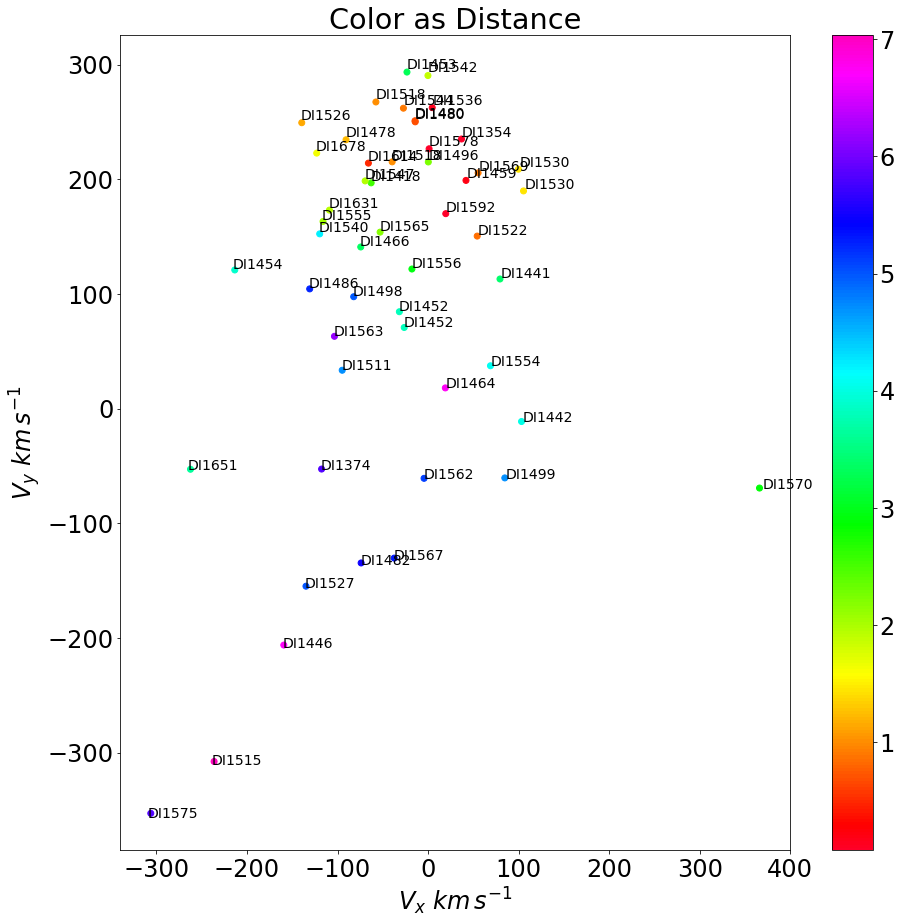

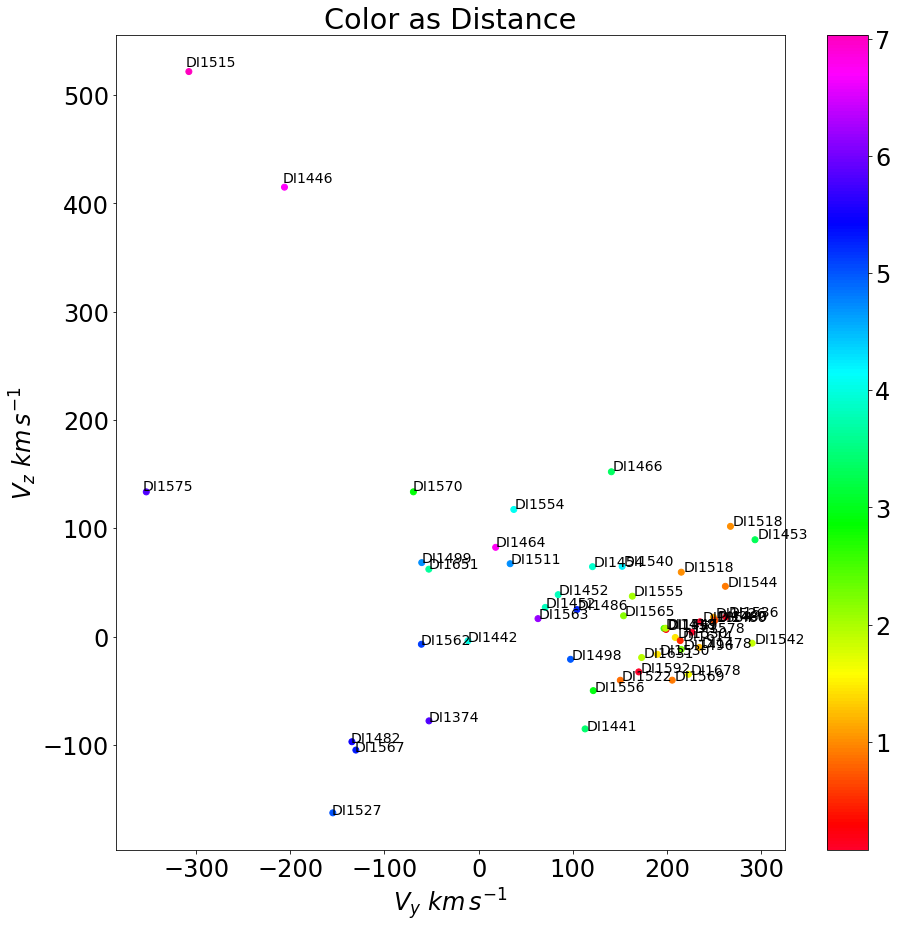

In [118]:
xvel = []
yvel = []
zvel = []
name = []
dist = []

for i in range(len(galact)):
    name.append(galact[i][1])
    xvel.append((galact[i][0].v_x).value)
    yvel.append((galact[i][0].v_y).value)
    zvel.append((galact[i][0].v_z).value)
    dist.append(())
    
xvel=np.squeeze(xvel)
yvel=np.squeeze(yvel)
zvel=np.squeeze(zvel)
dist=np.squeeze(dist)

plt.figure(figsize = (15,15))
plt.scatter(xvel.data,yvel.data,c=col.data,cmap='gist_rainbow')
#print(min(col),max(col))
plt.colorbar()
plt.xlabel(r'$V_{x}$ $km\,s^{-1}$')
plt.ylabel(r'$V_{y}$ $km\,s^{-1}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(xvel[i]*(1+0.01),yvel[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()


plt.figure(figsize = (15,15))
plt.scatter(yvel,zvel,c=col,cmap='gist_rainbow')
#print(min(col),max(col))
plt.colorbar()
plt.xlabel(r'$V_{y}$ $km\,s^{-1}$')
plt.ylabel(r'$V_{z}$ $km\,s^{-1}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(yvel[i]*(1+0.01),zvel[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

In [119]:
lms = []
bms = []

for i in range(len(heir)):
    c_icrs = SkyCoord(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree)
    c_ms = c_icrs.transform_to(ms.MagellanicStream)
    ms_l,ms_b = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree
    ms_l = ms_l-360
    lms.append(ms_l)
    bms.append(ms_b)

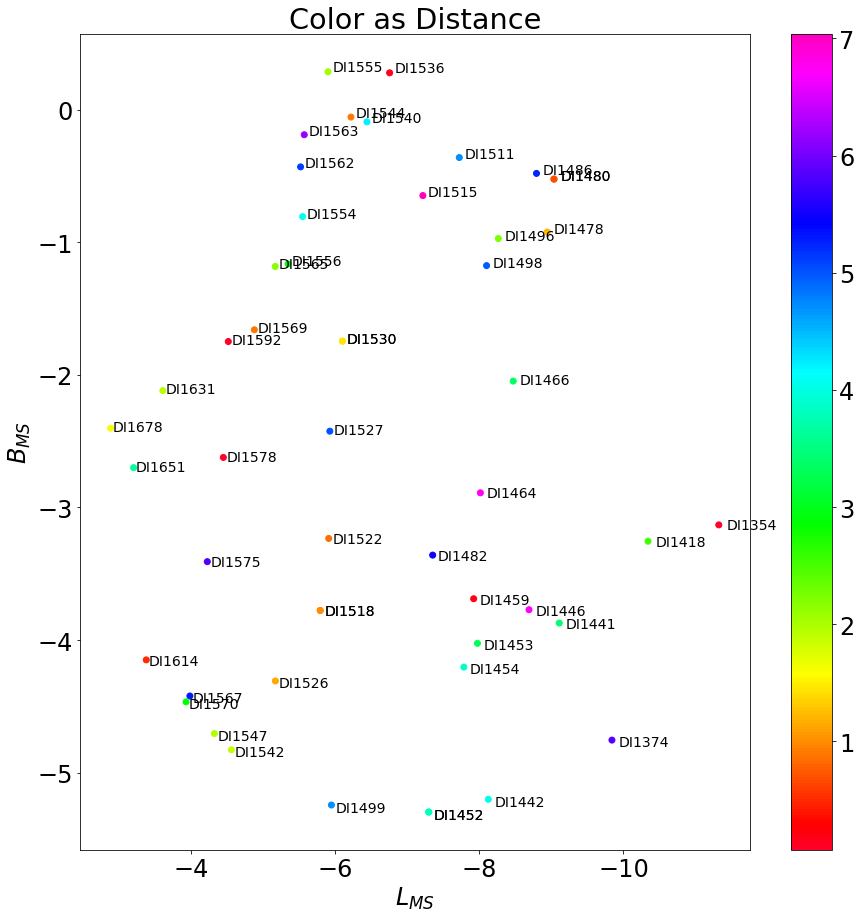

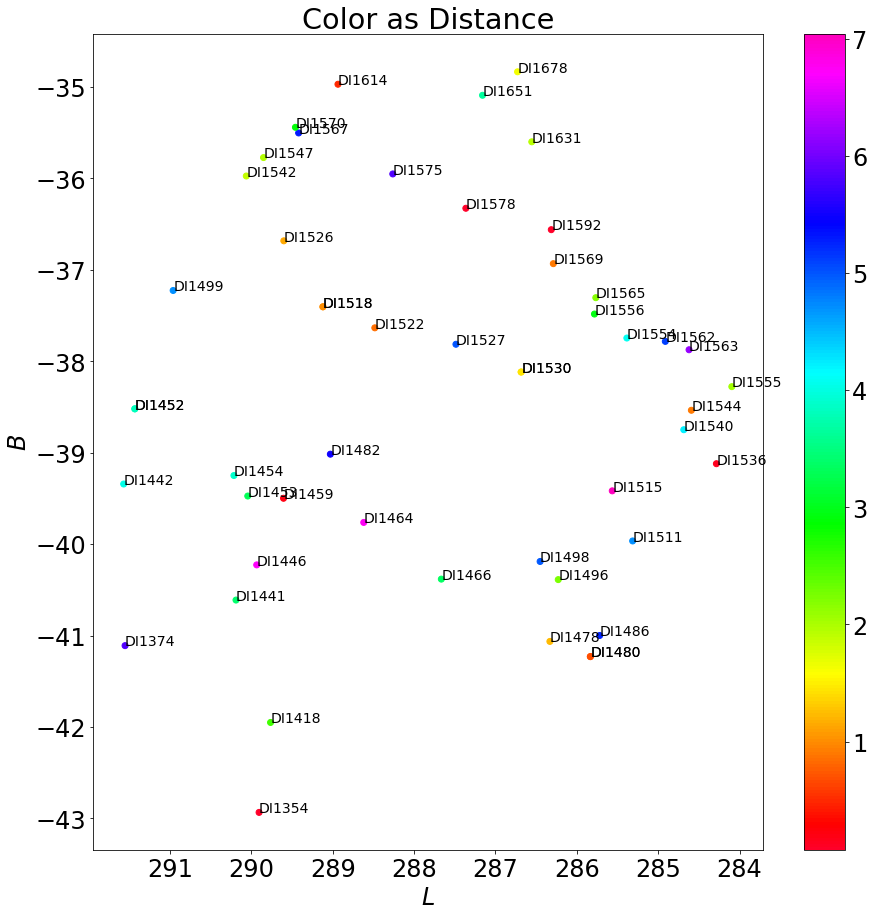

In [120]:
#position distance plot Magellanic Stream Coordinates
plt.figure(figsize = (15,15))
plt.scatter(lms,bms,c=col,cmap='gist_rainbow')
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel(r'$L_{MS}$')
plt.ylabel(r'$B_{MS}$')
plt.title(r'Color as Distance')
for i in range(len(lms)):
    plt.text(lms[i]*(1+0.01),bms[i]*(1+0.01),galact[i][1],fontsize=14)
plt.show()

#position distance plot Galactic Coordinates
plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=col,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as Distance')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

In [121]:
#Convert pmra and pmdec to pml and pmb (Galactic coordinates)
def pm_radec2gal(pmra,pmdec,ra,dec):
    lpm = []
    bpm = []
    alp_G = 192.85948
    del_G = 27.12825
    l_NGP = 122.93192
    rad = np.pi/180
    for i in range(len(pmra)):
        c1 = np.sin(del_G*rad)*np.cos(dec[i]*rad)-np.cos(del_G)*np.sin(dec[i])*np.cos((ra[i]-alp_G)*rad)
        c2 = np.cos(del_G*rad)*np.sin((ra[i]-alp_G)*rad)
        cosb = np.sqrt(c1**2+c2**2)
        trans_mat = (1/cosb)*np.array([[c1,c2],[-c2,c1]])
        pm_radec = np.array([pmra[i],pmdec[i]])
        pm_gal = np.matmul(trans_mat,pm_radec)
        lpm.append(pm_gal[0])
        bpm.append(pm_gal[1])
    return lpm, bpm

In [122]:
print(min(heir['pmra']),max(heir['pmdec']))

-39.65027730794304 31.115965199343808


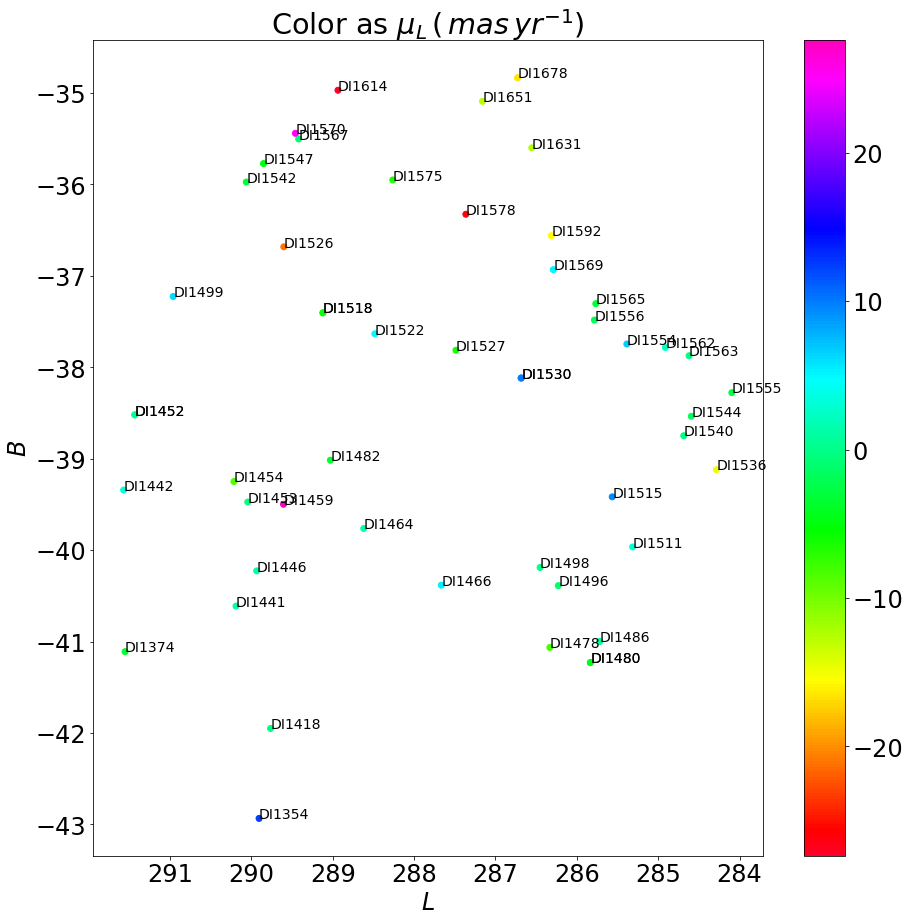

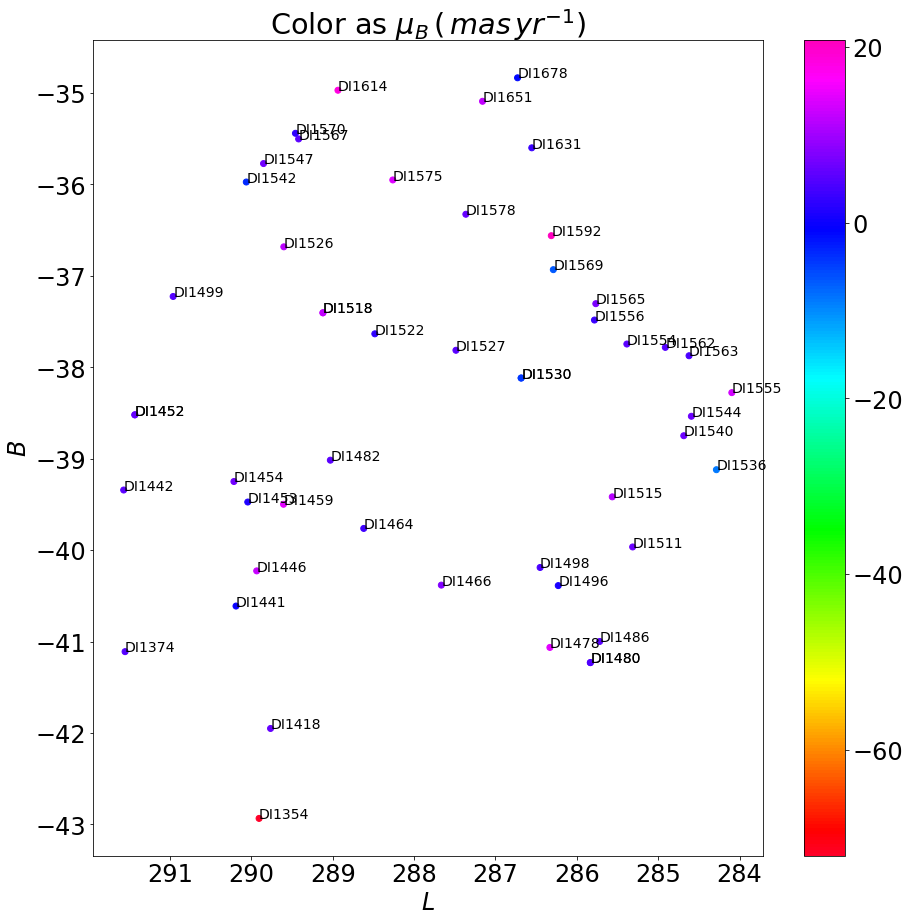

In [136]:
#proper motion plots
pml,pmb = pm_radec2gal(heir['pmra'],heir['pmdec'],heir['RA'],heir['DEC'])

#plot Magellanic Stream Coordinates
#plt.figure(figsize = (15,15))
#plt.scatter(lms,bms,c=pml,cmap='hsv')
#plt.colorbar()
#plt.gca().invert_xaxis()
#plt.xlabel(r'$L_{MS}$')
#plt.ylabel(r'$B_{MS}$')
#plt.title(r'Color as $$')
#for i in range(len(lms)):
#    plt.text(lms[i]*(1+0.01),bms[i]*(1+0.01),heir['NAME'][i],fontsize=14)
#plt.show()

#plot Galactic Coordinates
plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=pml,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $\mu_{L}\, (\,mas\,yr^{-1})$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=pmb,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $\mu_{B}\, (\,mas\,yr^{-1})$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

In [133]:
#angular momentum calculation
l = []

for i in range(len(galact)):
    r = [galact[i][0].x.value/1000,galact[i][0].y.value/1000,galact[i][0].z.value/1000]
    v = [galact[i][0].v_x.value,galact[i][0].v_y.value,galact[i][0].v_z.value]
    l.append(np.cross(r,v))
print(l)

[array([ 167.37865529,  173.70320124, -369.9972051 ]), array([ 115.57075224,  264.50160906, -583.35527887]), array([  480.35996446,   706.71587094, -2196.40431927]), array([  142.44982525,  1107.30058964, -1605.81048716]), array([-505.06529095,  348.1316065 ,   40.36814329]), array([  -80.43912803,  1314.93452423, -1258.19144631]), array([  206.1848763 ,    -5.10888276, -1968.36313906]), array([  103.91535462,   123.24638648, -2047.69528051]), array([-100.29701023, -260.27938633,  436.76977168]), array([  362.87131801,   787.97969285, -1401.47716083]), array([  370.24256543,   -92.82798938, -1670.64084999]), array([  524.84017425,   209.80194101, -1074.11225997]), array([-542.7529197 ,  128.62912099,  787.55220435]), array([-176.68170575,  851.89446416, -673.66621695]), array([-6471.45756526,  4802.5432038 ,   -97.14552786]), array([   84.08366287,   852.17101913, -2193.16883048]), array([  106.19658805,  -354.69166085, -1178.93553489]), array([  159.05749257,   240.41754055, -2117.599

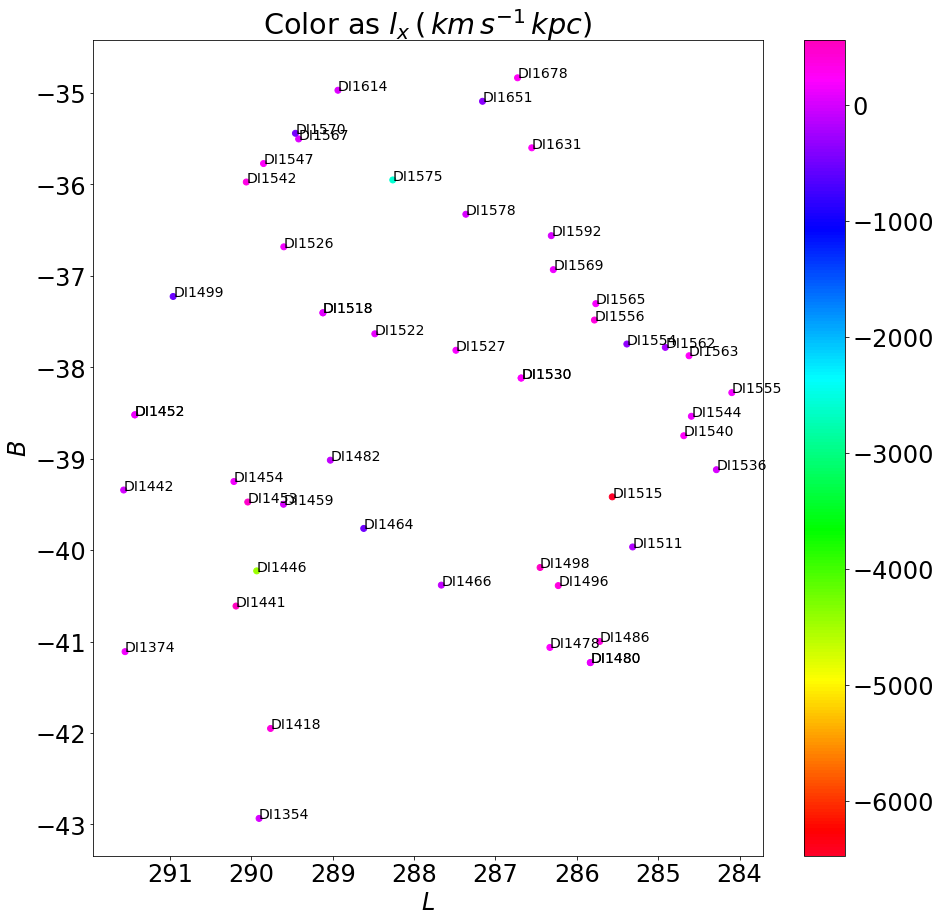

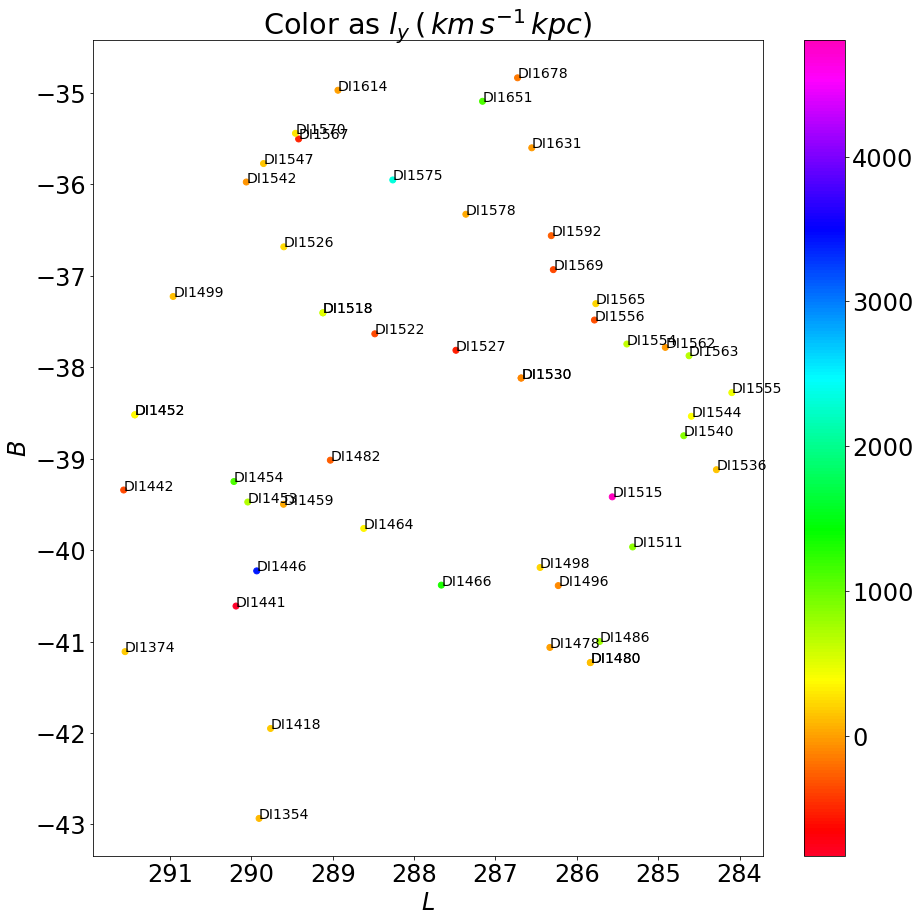

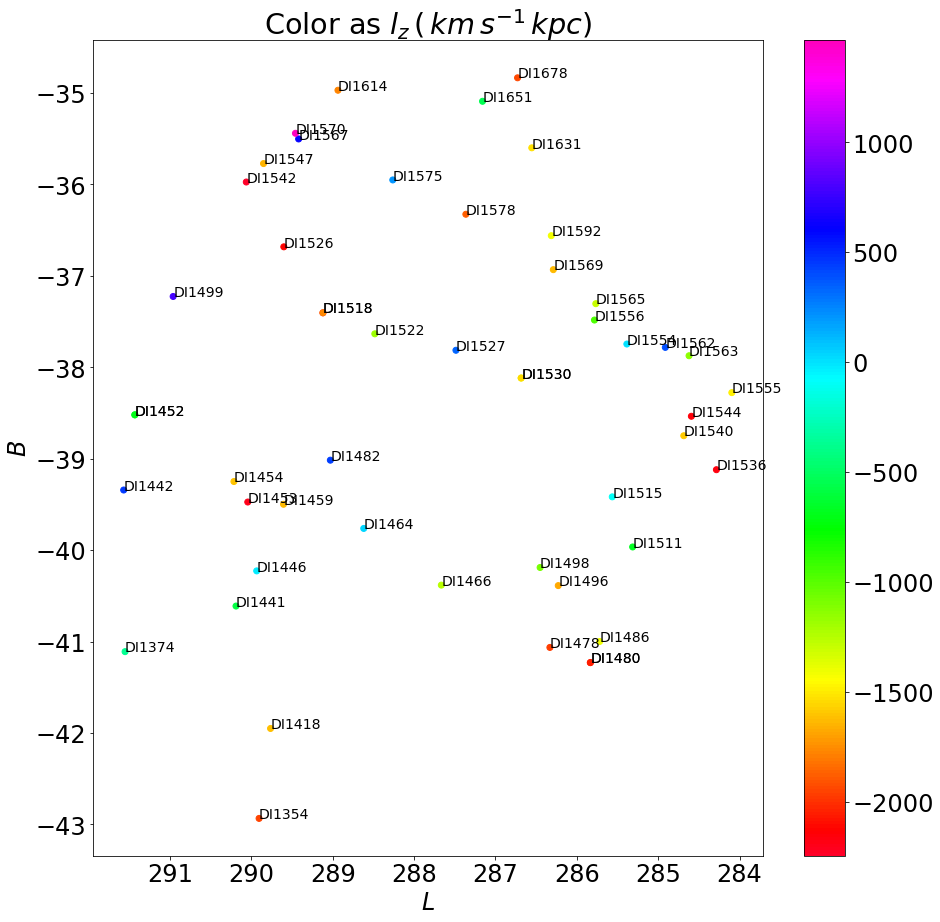

In [142]:
#Angular momentum COM is the Galactic center
lx = []
ly = []
lz = []

for i in range(len(l)):
    lx.append(l[i][0])
    ly.append(l[i][1])
    lz.append(l[i][2])

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=lx,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $l_{x}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=ly,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $l_{y}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize = (15,15))
plt.scatter(heir['GLON'],heir['GLAT'],c=lz,cmap='gist_rainbow')
plt.colorbar()
plt.xlabel(r'$L$')
plt.ylabel(r'$B$')
plt.title(r'Color as $l_{z}\, (\,km\,s^{-1}\,kpc)$')
for i in range(len(heir)):
    plt.text(heir['GLON'][i],heir['GLAT'][i],heir['NAME'][i],fontsize=14)
plt.gca().invert_xaxis()
plt.show()

In [92]:
absV = []
d = np.reciprocal(heir['parallax']+0.052)
for i in range(len(heir)):
    absV.append(heir['V'][i]-5*np.log10(d[i])+5)
    
print(absV)

[15.207130469577482, 16.72529605549753, 18.54044684058137, 17.54454636515608, 15.570678835221704, 16.320600486067924, 16.928308702314894, 19.576580068219474, 16.924581460503454, 16.165548867015126, 18.868302523549442, 16.914117515212446, 17.946559196435036, 18.003516138486358, 15.493313321037675, 20.065447769484294, 20.975960751081892, 16.93944731340467, 16.47697379686965, 16.51631858712932, 19.74370020852936, 17.563033948160765, 19.105980638782192, 25.800476679880695, 20.146121946606296, 15.70095963251459, 19.420137780838587, 16.985204311716487, 15.90163569427659, 16.72529605549753, 25.489269881294884, 19.576580068219474, 20.065447769484294, 16.51631858712932, 25.867682827593264, 18.4833898322243, 20.058034134153996, 20.18890859138887, 16.98816730242627, 15.537616297460222, 16.307397346015314, 16.298654307804618, 16.804345669600586, 19.36068362395563, 19.88304396798536, 15.019520957008542, 26.69237193600862, 18.004981628929386, 10.569343300719758, 6.517440194237687, 3.9325988325521863

In [127]:
galact[1][0]

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    (-6943.46213606, -3480.46386804, -2953.68791193)
 (v_x, v_y, v_z) in km / s
    (-26.34857635, 70.80761748, 26.88516679)>

In [135]:
len(l)

51